#### Import libraries

In [1]:

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.set_option('display.max_rows', 30)

In [2]:
movie = pd.read_csv("raw_data/movies.csv")

In [3]:
movie.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
movie["released_country"] = movie["released"].str.extract(r'\((.*?)\)')
movie["released"] = movie["released"].str.extract(r'(.*?) \(')

def parseDate(dateStr):
    for fmt in ("%B %d, %Y", "%B %Y", "%Y"):
        try:
            return pd.to_datetime(dateStr, format=fmt)
        except ValueError:
            continue
    return None

movie["released"] = movie["released"].apply(parseDate)

In [6]:
movie.isnull().sum()

# for col in movie.columns:
#     missing = np.mean(movie[col].isnull())
# print('{} - {}%'.format(col, missing))

name                   0
rating                77
genre                  0
year                   0
released               2
score                  3
votes                  3
director               0
writer                 3
star                   1
country                3
budget              2171
gross                189
company               17
runtime                4
released_country       2
dtype: int64

In [7]:
# movie['budget'] = movie["budget"].fillna(0).astype("int64")
# movie['gross'] = movie["gross"].fillna(0).astype("int64")
movie["budget"] = movie["budget"].replace(0, np.nan)
movie = movie.dropna(subset=["budget"])

In [8]:
movie['released_year'] = movie['released'].astype(str).str[:4]
# movie['released_month'] = movie['released'].astype(str).str[5:7]
# movie['released_day'].astype(str).str[8:]

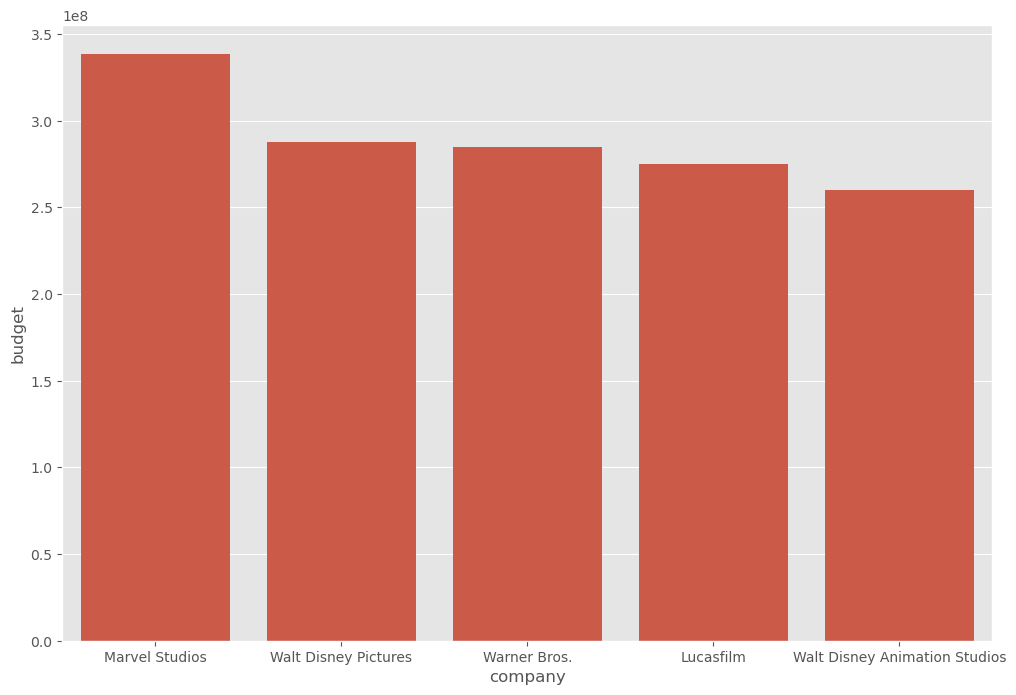

In [9]:
movie_bar = pd.DataFrame(movie.sort_values(by="budget", ascending=False)[:10])
sns.barplot(x="company", y="budget", data=movie_bar, errorbar=None)
plt.show()

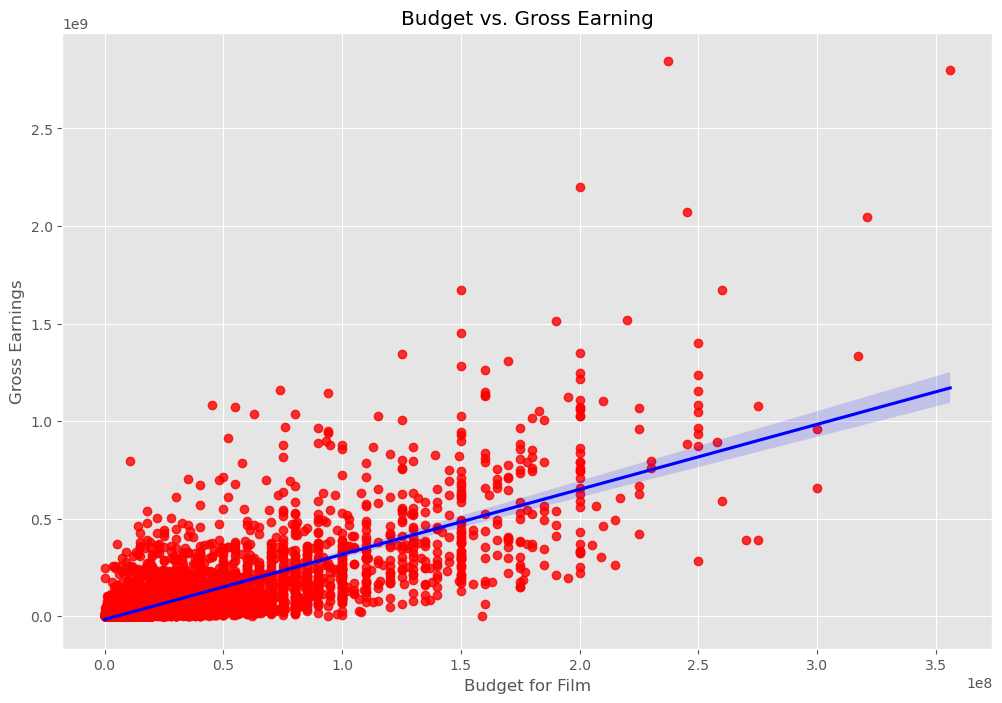

In [10]:
sns.regplot(x="budget", y="gross", data=movie, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title("Budget vs. Gross Earning")
plt.xlabel("Budget for Film")
plt.ylabel("Gross Earnings")
plt.show()

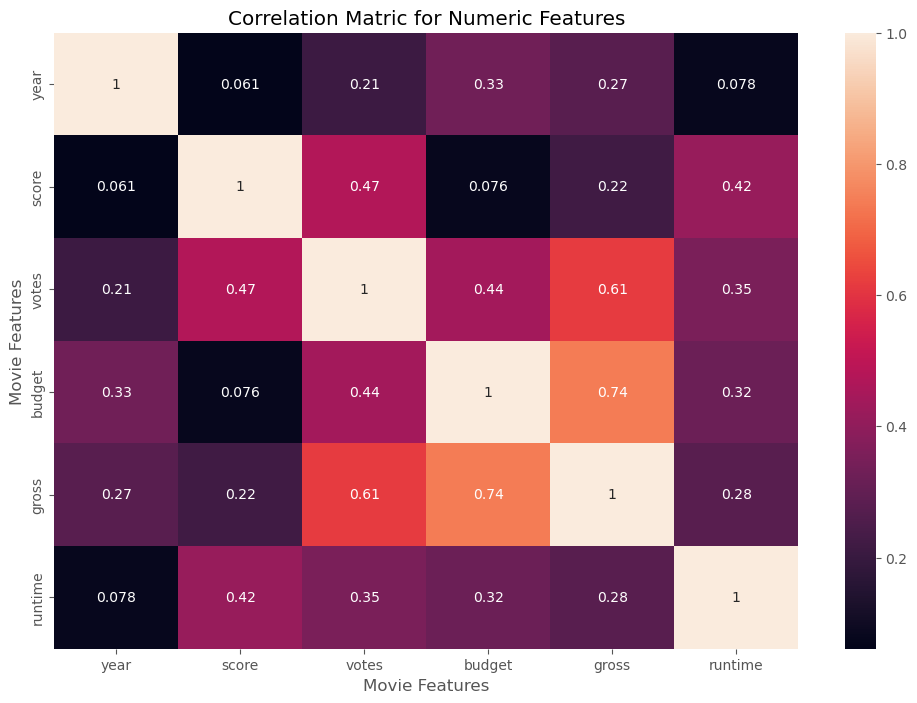

In [11]:
correlation_matrix = movie.corr(method="pearson", numeric_only=True)
# method = pearson / kendall / spearman
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matric for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [12]:
movie_numerized = movie.copy()

for col in movie_numerized.columns:
    if movie_numerized[col].dtype == "object":
        movie_numerized[col] = movie_numerized[col].astype("category")
        movie_numerized[col] = movie_numerized[col].cat.codes
movie_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_country,released_year
0,4760,6,6,1980,1980-06-13,8.4,927000.0,1834,2884,719,48,19000000.0,46998772.0,1473,146.0,49,0
1,3990,6,1,1980,1980-07-02,5.8,65000.0,1613,1177,223,49,4500000.0,58853106.0,468,104.0,49,0
2,3698,4,0,1980,1980-06-20,8.7,1200000.0,767,1852,1184,49,18000000.0,538375067.0,974,124.0,49,0
3,206,4,4,1980,1980-07-02,7.7,221000.0,901,1438,1510,49,3500000.0,83453539.0,1144,88.0,49,0
4,741,6,4,1980,1980-07-25,7.3,108000.0,727,357,281,49,6000000.0,39846344.0,1118,98.0,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661,2403,6,6,2020,2020-11-06,NaN,NaN,1092,400,1343,49,1000000.0,NaN,568,121.0,49,40
7662,4711,-1,0,2020,2020-11-10,NaN,NaN,493,76,179,49,10000.0,NaN,-1,90.0,49,40
7663,2651,-1,6,2020,2020-10-23,3.1,18.0,1058,1653,1631,49,7000.0,NaN,-1,90.0,49,40
7665,3377,-1,6,2020,2020-04-27,5.7,29.0,1463,1933,1367,49,58750.0,NaN,603,NaN,8,40


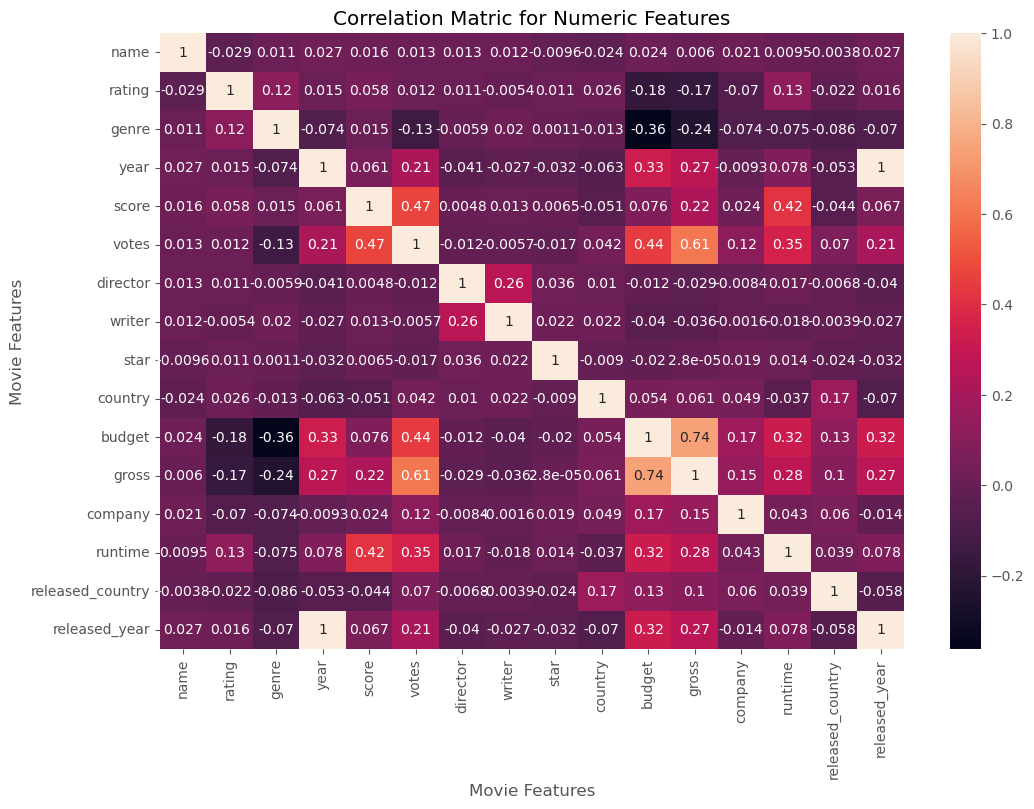

In [13]:
correlation_matrix = movie_numerized.corr(method="pearson", numeric_only=True)
# method = pearson / kendall / spearman
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matric for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [14]:
correlation_matrix_numerical = movie_numerized.corr(numeric_only=True)
correlation_pairs = correlation_matrix_numerical.unstack()
correlation_pairs_sorted = correlation_pairs.sort_values()

high_correlation = correlation_pairs_sorted[correlation_pairs_sorted > 0.5]
high_correlation

votes             gross               0.614904
gross             votes               0.614904
budget            gross               0.740395
gross             budget              0.740395
year              released_year       0.998659
released_year     year                0.998659
name              name                1.000000
runtime           runtime             1.000000
company           company             1.000000
gross             gross               1.000000
budget            budget              1.000000
country           country             1.000000
star              star                1.000000
writer            writer              1.000000
director          director            1.000000
votes             votes               1.000000
score             score               1.000000
year              year                1.000000
genre             genre               1.000000
rating            rating              1.000000
released_country  released_country    1.000000
released_year

## Conclusion: Votes and Budget have highest positive correlation to Gross Earnings